In [12]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
from time import sleep
from bs4 import BeautifulSoup
import lxml.html as lh
from datetime import datetime
from lxml import etree

options = webdriver.ChromeOptions() 
options.add_argument("--disable-blink-features=AutomationControlled")
options.add_experimental_option("excludeSwitches", ["enable-automation"])
options.add_experimental_option('useAutomationExtension', False)
driver = webdriver.Chrome(options=options)
driver.execute_script("Object.defineProperty(navigator, 'webdriver', {get: () => undefined})")
driver.execute_cdp_cmd('Network.setUserAgentOverride', {"userAgent": 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.53 Safari/537.36'})
print(driver.execute_script("return navigator.userAgent;"))
driver.get('https://www.httpbin.org/headers')

Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.53 Safari/537.36


In [86]:
import numpy as np

pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_rows', None)     # Display all rows
np.set_printoptions(threshold=np.inf)       # Display entire numpy arrays

In [14]:
url = 'https://fbref.com/en/comps/9/stats/Premier-League-Stats#all_stats_standard'
driver.get(url)
driver.implicitly_wait(10)

In [15]:
import pandas as pd
html_content = driver.page_source

# Create a BeautifulSoup object from the HTML content
soup = BeautifulSoup(html_content, 'html.parser')

# Find all table rows in the tbody section
table = soup.find('table', id="stats_standard")
# then we can iterate through each row and extract either header or row values:
header = []
rows = []
for i, row in enumerate(table.find_all('tr')):
    if i == 0:
        header = [el.text.strip() for el in row.find_all('th')]
    else:
        rows.append([el.text.strip() for el in row.find_all('td')])

In [18]:
# header.pop(0)
# print(header)
# print(rows)

['Playing Time', 'Performance', 'Expected', 'Progression', 'Per 90 Minutes', '']
[[], ['Brenden Aaronson', 'us USA', 'MF,FW', 'Leeds United', '21', '2000', '36', '28', '2,372', '26.4', '1', '3', '4', '1', '0', '0', '2', '0', '3.9', '3.9', '4.2', '8.1', '43', '86', '151', '0.04', '0.11', '0.15', '0.04', '0.15', '0.15', '0.16', '0.31', '0.15', '0.31', 'Matches'], ['George Abbott', 'eng ENG', 'MF', 'Tottenham', '16', '2005', '1', '0', '1', '0.0', '0', '0', '0', '0', '0', '0', '0', '0', '0.0', '0.0', '0.0', '0.0', '0', '0', '0', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', 'Matches'], ['Che Adams', 'sct SCO', 'FW', 'Southampton', '26', '1996', '28', '23', '1,992', '22.1', '5', '3', '8', '5', '0', '0', '1', '0', '6.6', '6.6', '2.8', '9.4', '17', '34', '115', '0.23', '0.14', '0.36', '0.23', '0.36', '0.30', '0.13', '0.42', '0.30', '0.42', 'Matches'], ['Tyler Adams', 'us USA', 'MF', 'Leeds United', '23', '1999', '24', '24', '2,156', '24.0', '0', '0', '0', '0'

In [52]:
player_stats = pd.DataFrame(data=rows, columns=headers)
player_stats.head(10)

Player   Nation   Pos            Squad   Age  Born    MP Starts  \
0             None     None  None             None  None  None  None   None   
1   Erling Haaland   no NOR    FW  Manchester City    22  2000    35     33   
2       Harry Kane  eng ENG    FW        Tottenham    29  1993    38     38   
3       Ivan Toney  eng ENG    FW        Brentford    26  1996    33     33   
4    Mohamed Salah   eg EGY    FW        Liverpool    30  1992    38     37   
5    Callum Wilson  eng ENG    FW    Newcastle Utd    30  1992    31     21   
6  Marcus Rashford  eng ENG    FW   Manchester Utd    24  1997    35     32   
7       Martinelli   br BRA    FW          Arsenal    21  2001    36     34   
8    Ollie Watkins  eng ENG    FW      Aston Villa    26  1995    37     36   
9  Martin Ødegaard   no NOR    MF          Arsenal    23  1998    37     37   

     Min   90s  ...   Ast   G+A  G-PK G+A-PK    xG   xAG xG+xAG  npxG  \
0   None  None  ...  None  None  None   None  None  None   None  None   
1  2,769  30.8  ...  0.26  1.43  0.94   1.20  0.92  0.17   1.10  0.75   
2  3,405  37.8  ...  0.08  0.87  0.66   0.74  0.57  0.18   0.75  0.44   
3  2,951  32.8  ...  0.12  0.73  0.43   0.55  0.57  0.15   0.73  0.40   
4  3,290  36.6  ...  0.33  0.85  0.47   0.79  0.59  0.21   0.80  0.51   
5  1,877  20.9  ...  0.24  1.10  0.72   0.96  0.84  0.13   0.97  0.72   
6  2,879  32.0  ...  0.16  0.69  0.53   0.69  0.48  0.11   0.59  0.48   
7  2,789  31.0  ...  0.16  0.65  0.48   0.65  0.30  0.29   0.59  0.30   
8  3,127  34.7  ...  0.17  0.60  0.40   0.58  0.47  0.11   0.58  0.43   
9  3,127  34.7  ...  0.20  0.63  0.43   0.63  0.29  0.23   0.52  0.29   

  npxG+xAG  Matches  
0     None     None  
1     0.92  Matches  
2     0.63  Matches  
3     0.56  Matches  
4     0.72  Matches  
5     0.85  Matches  
6     0.59  Matches  
7     0.59  Matches  
8     0.54  Matches  
9     0.52  Matches  

[10 rows x 36 columns]

In [54]:
player_stats.drop(index=0)

Player   Nation   Pos            Squad   Age  Born    MP Starts  \
1    Erling Haaland   no NOR    FW  Manchester City    22  2000    35     33   
2        Harry Kane  eng ENG    FW        Tottenham    29  1993    38     38   
3        Ivan Toney  eng ENG    FW        Brentford    26  1996    33     33   
4     Mohamed Salah   eg EGY    FW        Liverpool    30  1992    38     37   
5     Callum Wilson  eng ENG    FW    Newcastle Utd    30  1992    31     21   
..              ...      ...   ...              ...   ...   ...   ...    ...   
587            None     None  None             None  None  None  None   None   
588            None     None  None             None  None  None  None   None   
589            None     None  None             None  None  None  None   None   
590            None     None  None             None  None  None  None   None   
591            None     None  None             None  None  None  None   None   

       Min   90s  ...   Ast   G+A  G-PK G+A-PK    xG   xAG xG+xAG  npxG  \
1    2,769  30.8  ...  0.26  1.43  0.94   1.20  0.92  0.17   1.10  0.75   
2    3,405  37.8  ...  0.08  0.87  0.66   0.74  0.57  0.18   0.75  0.44   
3    2,951  32.8  ...  0.12  0.73  0.43   0.55  0.57  0.15   0.73  0.40   
4    3,290  36.6  ...  0.33  0.85  0.47   0.79  0.59  0.21   0.80  0.51   
5    1,877  20.9  ...  0.24  1.10  0.72   0.96  0.84  0.13   0.97  0.72   
..     ...   ...  ...   ...   ...   ...    ...   ...   ...    ...   ...   
587   None  None  ...  None  None  None   None  None  None   None  None   
588   None  None  ...  None  None  None   None  None  None   None  None   
589   None  None  ...  None  None  None   None  None  None   None  None   
590   None  None  ...  None  None  None   None  None  None   None  None   
591   None  None  ...  None  None  None   None  None  None   None  None   

    npxG+xAG  Matches  
1       0.92  Matches  
2       0.63  Matches  
3       0.56  Matches  
4       0.72  Matches  
5       0.85  Matches  
..       ...      ...  
587     None     None  
588     None     None  
589     None     None  
590     None     None  
591     None     None  

[591 rows x 36 columns]

In [57]:
player_stats = player_stats.iloc[:570, :]
player_stats.tail()

Player   Nation    Pos            Squad Age  Born  MP Starts  \
565      Ryan Yates  eng ENG     MF  Nott'ham Forest  24  1997  26     21   
566  Illia Zabarnyi   ua UKR     DF      Bournemouth  19  2002   5      3   
567   Denis Zakaria   ch SUI     MF          Chelsea  25  1996   7      5   
568   Jordan Zemura   zw ZIM     DF      Bournemouth  22  1999  19     17   
569    Hakim Ziyech   ma MAR  FW,MF          Chelsea  29  1993  18      6   

       Min   90s  ...   Ast   G+A  G-PK G+A-PK    xG   xAG xG+xAG  npxG  \
565  1,837  20.4  ...  0.10  0.10  0.00   0.10  0.11  0.06   0.17  0.11   
566    299   3.3  ...  0.00  0.00  0.00   0.00  0.00  0.00   0.00  0.00   
567    411   4.6  ...  0.00  0.00  0.00   0.00  0.04  0.01   0.05  0.04   
568  1,454  16.2  ...  0.06  0.06  0.00   0.06  0.02  0.11   0.14  0.02   
569    661   7.3  ...  0.41  0.41  0.00   0.41  0.08  0.30   0.38  0.08   

    npxG+xAG  Matches  
565     0.17  Matches  
566     0.00  Matches  
567     0.05  Matches  
568     0.14  Matches  
569     0.38  Matches  

[5 rows x 36 columns]

In [59]:
player_stats.to_csv('PremierLeaguePlayerSats22-23.csv', index=False)

In [24]:
players = pd.read_csv('PremierLeaguePlayerSats22-23.csv')
players.head()

Player   Nation  Pos            Squad   Age    Born    MP  Starts  \
0             NaN      NaN  NaN              NaN   NaN     NaN   NaN     NaN   
1  Erling Haaland   no NOR   FW  Manchester City  22.0  2000.0  35.0    33.0   
2      Harry Kane  eng ENG   FW        Tottenham  29.0  1993.0  38.0    38.0   
3      Ivan Toney  eng ENG   FW        Brentford  26.0  1996.0  33.0    33.0   
4   Mohamed Salah   eg EGY   FW        Liverpool  30.0  1992.0  38.0    37.0   

     Min   90s  ...  Ast.1  G+A.1  G-PK.1  G+A-PK  xG.1  xAG.1  xG+xAG  \
0    NaN   NaN  ...    NaN    NaN     NaN     NaN   NaN    NaN     NaN   
1  2,769  30.8  ...   0.26   1.43    0.94    1.20  0.92   0.17    1.10   
2  3,405  37.8  ...   0.08   0.87    0.66    0.74  0.57   0.18    0.75   
3  2,951  32.8  ...   0.12   0.73    0.43    0.55  0.57   0.15    0.73   
4  3,290  36.6  ...   0.33   0.85    0.47    0.79  0.59   0.21    0.80   

   npxG.1  npxG+xAG.1  Matches  
0     NaN         NaN      NaN  
1    0.75        0.92  Matches  
2    0.44        0.63  Matches  
3    0.40        0.56  Matches  
4    0.51        0.72  Matches  

[5 rows x 36 columns]

In [30]:
players = players.drop(index=0)

In [31]:
players.head()

Player   Nation Pos            Squad   Age    Born    MP  Starts  \
1  Erling Haaland   no NOR  FW  Manchester City  22.0  2000.0  35.0    33.0   
2      Harry Kane  eng ENG  FW        Tottenham  29.0  1993.0  38.0    38.0   
3      Ivan Toney  eng ENG  FW        Brentford  26.0  1996.0  33.0    33.0   
4   Mohamed Salah   eg EGY  FW        Liverpool  30.0  1992.0  38.0    37.0   
5   Callum Wilson  eng ENG  FW    Newcastle Utd  30.0  1992.0  31.0    21.0   

     Min   90s  ...  Ast.1  G+A.1  G-PK.1  G+A-PK  xG.1  xAG.1  xG+xAG  \
1  2,769  30.8  ...   0.26   1.43    0.94    1.20  0.92   0.17    1.10   
2  3,405  37.8  ...   0.08   0.87    0.66    0.74  0.57   0.18    0.75   
3  2,951  32.8  ...   0.12   0.73    0.43    0.55  0.57   0.15    0.73   
4  3,290  36.6  ...   0.33   0.85    0.47    0.79  0.59   0.21    0.80   
5  1,877  20.9  ...   0.24   1.10    0.72    0.96  0.84   0.13    0.97   

   npxG.1  npxG+xAG.1  Matches  
1    0.75        0.92  Matches  
2    0.44        0.63  Matches  
3    0.40        0.56  Matches  
4    0.51        0.72  Matches  
5    0.72        0.85  Matches  

[5 rows x 36 columns]

In [39]:
players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 1 to 569
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player       569 non-null    object 
 1   Nation       568 non-null    object 
 2   Pos          569 non-null    object 
 3   Squad        569 non-null    object 
 4   Age          569 non-null    float64
 5   Born         569 non-null    float64
 6   MP           569 non-null    float64
 7   Starts       569 non-null    float64
 8   Min          569 non-null    object 
 9   90s          569 non-null    float64
 10  Gls          569 non-null    float64
 11  Ast          569 non-null    float64
 12  G+A          569 non-null    float64
 13  npGls        569 non-null    float64
 14  PK           569 non-null    float64
 15  PKatt        569 non-null    float64
 16  CrdY         569 non-null    float64
 17  CrdR         569 non-null    float64
 18  xG           569 non-null    float64
 19  npxG    

In [36]:
# Rename the columns
new_column_names = {'Gls▼': 'Gls', 'G-PK': 'npGls', 'Gls': 'Glsp90', 'Ast.1': 'Astp90', 'G+A.1': 'G+Ap90', 
                    'G-PK.1': 'npGlsp90', 'G+A-PK': 'npGlsAstp90', 'xG.1': 'xGp90', 'xAG.1': 'xAGp90', 'xG+xAG': 'xG+xAGp90',
                   'npxG.1': 'npxGp90', 'npxG+xAG.1': 'npxG+xAGp90'}

players = players.rename(columns=new_column_names)

In [38]:
players = players.iloc[:, :-1]
players.head()

Player   Nation Pos            Squad   Age    Born    MP  Starts  \
1  Erling Haaland   no NOR  FW  Manchester City  22.0  2000.0  35.0    33.0   
2      Harry Kane  eng ENG  FW        Tottenham  29.0  1993.0  38.0    38.0   
3      Ivan Toney  eng ENG  FW        Brentford  26.0  1996.0  33.0    33.0   
4   Mohamed Salah   eg EGY  FW        Liverpool  30.0  1992.0  38.0    37.0   
5   Callum Wilson  eng ENG  FW    Newcastle Utd  30.0  1992.0  31.0    21.0   

     Min   90s  ...  Glsp90  Astp90  G+Ap90  npGlsp90  npGlsAstp90  xGp90  \
1  2,769  30.8  ...    1.17    0.26    1.43      0.94         1.20   0.92   
2  3,405  37.8  ...    0.79    0.08    0.87      0.66         0.74   0.57   
3  2,951  32.8  ...    0.61    0.12    0.73      0.43         0.55   0.57   
4  3,290  36.6  ...    0.52    0.33    0.85      0.47         0.79   0.59   
5  1,877  20.9  ...    0.86    0.24    1.10      0.72         0.96   0.84   

   xAGp90  xG+xAGp90  npxGp90  npxG+xAGp90  
1    0.17       1.10     0.75         0.92  
2    0.18       0.75     0.44         0.63  
3    0.15       0.73     0.40         0.56  
4    0.21       0.80     0.51         0.72  
5    0.13       0.97     0.72         0.85  

[5 rows x 35 columns]

In [43]:
players.to_csv('PremierLeaguePlayerStats22-23.csv', index=False)

In [56]:
players = pd.read_csv('PremierLeaguePlayerStats22-23.csv')

In [57]:
players[players['Player'] == 'Alexis Mac Allister']

Player  Nation Pos     Squad   Age    Born    MP  Starts  \
21  Alexis Mac Allister  ar ARG  MF  Brighton  23.0  1998.0  35.0    31.0   

      Min   90s  ...  Glsp90  Astp90  G+Ap90  npGlsp90  npGlsAstp90  xGp90  \
21  2,886  32.1  ...    0.31    0.06    0.37      0.12         0.19   0.38   

    xAGp90  xG+xAGp90  npxGp90  npxG+xAGp90  
21    0.13       0.51     0.23         0.36  

[1 rows x 35 columns]

In [58]:
players_df = players.copy()

In [59]:
players['Min'] = players['Min'].replace({',':''}, regex=True)

In [60]:
players['Min'] = pd.to_numeric(players['Min'])

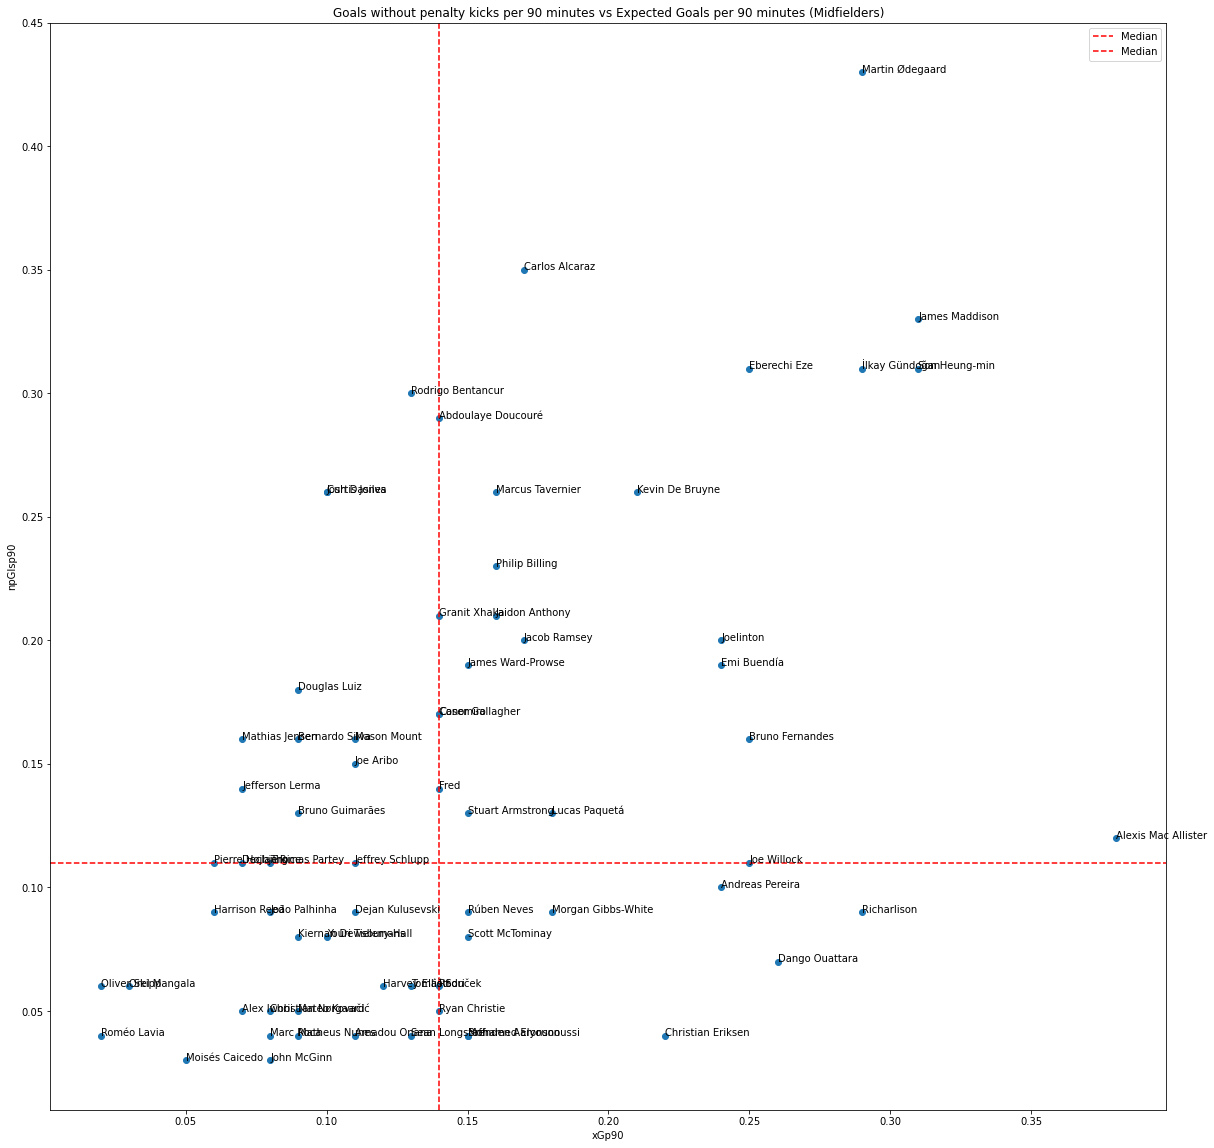

In [95]:
import matplotlib.pyplot as plt

# # Get only players whose 'Pos' column contains 'MF' and 'MP' > 1000
# midfielders = players[(players['Pos'].str.contains('MF')) & (players['Min'] > 1000)]
midfielders = players[((players['Pos'] == 'MF') | (players['Pos'] == 'MF,FW')) & (players['Min'] > 1000)]

# Filter players for whom Gls90 > 0
midfielders = midfielders[midfielders['npGlsp90'] > 0.0]

# Set the figure size
plt.figure(figsize=(20, 20))

# Calculate median values for x and y variables
x_median = midfielders['xGp90'].median()
y_median = midfielders['npGlsp90'].median()

# Plot 'Glsp90' against 'xGp90'
plt.scatter(midfielders['xGp90'], midfielders['npGlsp90'])
plt.xlabel('xGp90')
plt.ylabel('npGlsp90')
plt.title('Goals without penalty kicks per 90 minutes vs Expected Goals per 90 minutes (Midfielders)')

# Annotate each data point with the player's name
for i, player in midfielders.iterrows():
    plt.text(player['xGp90'], player['npGlsp90'], player['Player'])
    
# Add median lines
plt.axhline(y=y_median, color='r', linestyle='--', label='Median')
plt.axvline(x=x_median, color='r', linestyle='--', label='Median')
    
plt.legend()
plt.show()

In [96]:
midfielders['Player']

8            Martin Ødegaard
18              Eberechi Eze
19             Son Heung-min
21       Alexis Mac Allister
22            James Maddison
27         James Ward-Prowse
28           Bruno Fernandes
29            İlkay Gündoğan
31            Philip Billing
32           Kevin De Bruyne
41              Granit Xhaka
47                 Joelinton
48              Douglas Luiz
50               Rúben Neves
52              Jacob Ramsey
59         Rodrigo Bentancur
60               Emi Buendía
61        Abdoulaye Doucouré
63        Morgan Gibbs-White
67            Mathias Jensen
68           Jefferson Lerma
71          Marcus Tavernier
75            Carlos Alcaraz
80                  Casemiro
83              Josh Dasilva
87           Bruno Guimarães
88           Pierre Højbjerg
92             Lucas Paquetá
93           Andreas Pereira
95               Declan Rice
96            Bernardo Silva
99            Jaidon Anthony
103          Conor Gallagher
108             Curtis Jones
110           

In [98]:
show_names = ['Martin Ødegaard', 'Alexis Mac Allister', 'James Maddison', 'James Ward-Prowse', 'Bruno Fernandes', 
              'İlkay Gündoğan', 'Philip Billing', 'Kevin De Bruyne', 'Granit Xhaka', 'Joelinton', 'Douglas Luiz', 
              'Jacob Ramsey', 'Emi Buendía', 'Morgan Gibbs-White', 'Carlos Alcaraz', 'Pierre Højbjerg',
              'Lucas Paquetá', 'Andreas Pereira', 'Declan Rice', 'Bernardo Silva', 'Conor Gallagher', 'Curtis Jones',
              'Mason Mount', 'Youri Tielemans', 'Joe Willock', 'Kiernan Dewsbury-Hall', 'Fred',
              'Brenden Aaronson', 'Moisés Caicedo', 'Harvey Elliott', 'Christian Eriksen', 'Mateo Kovačić', 
              'Sean Longstaff', 'John McGinn', 'Scott McTominay', 'Matheus Nunes']

36

In [100]:
# Exclude names in 'show_names' list
player_names = midfielders['Player'].tolist()
show_badges = [name for name in player_names if name not in show_names]

print(show_badges)

['Eberechi Eze', 'Son Heung-min', 'Rúben Neves', 'Rodrigo Bentancur', 'Abdoulaye Doucouré', 'Mathias Jensen', 'Jefferson Lerma', 'Marcus Tavernier', 'Casemiro', 'Josh Dasilva', 'Bruno Guimarães', 'Jaidon Anthony', 'João Palhinha', 'Thomas Partey', 'Harrison Reed', 'Jeffrey Schlupp', 'Joe Aribo', 'Stuart Armstrong', 'Alex Iwobi', 'Dejan Kulusevski', 'Rodri', 'Tomáš Souček', 'Ryan Christie', 'Mohamed Elyounoussi', 'Roméo Lavia', 'Orel Mangala', 'Christian Nørgaard', 'Amadou Onana', 'Dango Ouattara', 'Richarlison', 'Marc Roca', 'Oliver Skipp']


In [161]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Set the figure size
plt.figure(figsize=(20, 20), dpi=600)

# Calculate median values for x and y variables
x_median = midfielders['xGp90'].median()
y_median = midfielders['npGlsp90'].median()

# Plot 'Glsp90' against 'xGp90'
plt.scatter(midfielders['xGp90'], midfielders['npGlsp90'], marker='o', color='green')
plt.xlabel('xGp90')
plt.ylabel('npGlsp90')
plt.title('Non Penalty Goals per 90 minutes vs Expected Goals per 90 minutes (Midfielders)')

# Annotate some data points with player names
for i, player in midfielders.iterrows():
    if player['Player'] in show_names:
        plt.text(player['xGp90'], player['npGlsp90'], player['Player'])

# Add club logos for selected data points
for i, player in midfielders.iterrows():
#     if player['Player'] in show_badges:
    img_path = 'club-logos/' + player['Squad'] + '.png'
    image = plt.imread(img_path)
    imagebox = OffsetImage(image, zoom = 0.075, alpha = 1)
    ab = AnnotationBbox(imagebox, (player['xGp90'], player['npGlsp90']), frameon=False)
    plt.gca().add_artist(ab)

# Add median lines
plt.axhline(y=y_median, color='r', linestyle='--', label='Median npGlsp90')
plt.axvline(x=x_median, color='r', linestyle='--', label='Median xGp90')

# Quadrants explanation
plt.text(0.025,0.43,"More goals",color="green",size="12")
plt.text(0.025,0.42,"Less expected goals (Player overperformed)",color="red",size="12")

plt.text(0.335,0.43,"Higher expected goals",color="green",size="12")
plt.text(0.335,0.42,"More goals",color="green",size="12")

plt.text(0.31,0.032,"Higher expected goals)",color="green",size="12")
plt.text(0.31,0.025,"Fewer goals (Player underperformed)",color="red",size="12")

# Annotate with text + Arrow
x_mcallister = (midfielders[midfielders['Player'] == 'Alexis Mac Allister'])['xGp90']
y_mcallister = (midfielders[midfielders['Player'] == 'Alexis Mac Allister'])['npGlsp90']
plt.annotate('This point is interesting!', xy=(x_mcallister, y_mcallister), xytext=(0.12, 0.32), arrowprops=dict(facecolor='black', shrink=0.005))

plt.legend()

# Save the plot with higher DPI
plt.savefig('Goal Scoring.png', dpi=300)

plt.show()